# How to Prepare Your Data

https://machinelearningmastery.com/how-to-prepare-data-for-machine-learning/


- Step 1: Select Data
- Step 2: Preprocess Data
- Step 3: Transform Data


## Step 1: Select Data

What data is actually needed to address the goal or question. Make assumptions about the data and record these assumptions to make sure your model isnt made on shifting sand. Everything that you assume to be true about your data, whether it be intuition or something else should be treated with a scientific criticism.

What data do I need to have?

What data do I want have that I don't?

What data do I not need?

## Step 2: Preprocess Data

Formatting - computer files

Cleaning - removal or filling of missing data

Sampling - If we have a lot of data, break off a piece to work with on your preliminary investigation


## Step 3: Transform Data

Scaling - Use a standard scaler to reduce the effect of data being exaggerated because it is bigger than other features.

Decomposition - Break apart features into component parts if they are more useful than the whole

Aggregation - Put together data if it is more useful as a whole


**~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~**

# Model Selection: Identify Outliers


https://machinelearningmastery.com/how-to-identify-outliers-in-your-data/



Outliers in input data can skew the training process.


## Outlier Modeling

Some examples of outlier detection methods:

- Extreme Value Analysis: Determine the tails of data distributions.
- Linear Models: Data that has a high residual from a decomposition regression
- Proximity Based Models: Data outside of common clusters



## Get Started

Pick your poison, but make a stepwise process to check for outliers in the data.

Extreme Value Analysis -> clustering methods -> Projection methods

### 1. Extreme Value Analysis

Visualize the data with scatterplots and histograms and box plots while looking for extreme values. This will only be useful for 1-2 dimensional analysis.

Look for values 3 standard deviations from the mean

Filter out outliers and assess model performance.


### 2. Proximity Methods (Clustering)

Identify the natural clusters of the data (K means). Mark the cluster centroids. I dentify data instances that are exceptionally far from cluster centroids. (percentage distance?) 

Filter out thes outliers and assess model performance


### 3. Projection Methods 

Summarize your data to 2 dimensions with linear decomposition techniques (pca, LDA, SOM?). Then visualize the new mapping and identify outliers by hand.

Fiter out and assess







# Data Preperation

- Add attributes - Categorize non numeric features, transform attributes mathematically to take advantage of possible linear relationships, and impute missing data with k nearest neighbor (ie averaging)

- Remove Attributes - Project into lower subspace(PCA, LDA), Spatial sign projection (map onto multidim sphere), identify and remove highly correlated attributes

- Transform Attributes - Center and scale (standardize), Remove skew, binning


# Feature Selection

https://machinelearningmastery.com/an-introduction-to-feature-selection/

Used to remove irrelevent features that only add noise to your model. Reduces complexity of model, improves performance, blah blah blah

## Feature Selection Algorithms:

### Filter Methods (SelectKBest)

Assign a statistical score to each attribute and rank them. Greedy method, not necessarily the best combination of features. Info gain, chi square, correlation coeff scores.

### Wrapper Methods (RFE)

Combinations of attributes are tested and compared, search method through different subspaces. best fit, random hill.

### Embedded Methods (SelectFromModel)

Learn best contributing features during fitting. The algorithm selects features by itself L1 Regularization



## Feature Selection Traps

https://stats.stackexchange.com/questions/2306/feature-selection-for-final-model-when-performing-cross-validation-in-machine

*The cross-validation is only used to estimate the predictive performance of the single model trained on the whole dataset. It is VITAL in using cross-validation that in each fold you repeat the entire procedure used to fit the primary model, as otherwise you can end up with a substantial optimistic bias in performance."*

https://stats.stackexchange.com/questions/27750/feature-selection-and-cross-validation

*If you perform feature selection on all of the data and then cross-validate, then the test data in each fold of the cross-validation procedure was also used to choose the features and this is what biases the performance analysis."*

We chose our features based on performance on a testing set which is resampled during cross val. We know it will overperform during CV.
If we perform feature selection before model evaluation, we run the possibility of selecting features that fit the test data by random chance

**PERFORM FEATURE SELECTION INDEPENDENTLY WITHIN EACH FOLD OF CROSS VALIDATION.**



***"The key idea is that cross-validation is a way of estimating the generalisation performance of a process for building a model, so you need to repeat the whole process in each fold. Otherwise you will end up with a biased estimate, or an under-estimate of the variance of the estimate (or both)."***

# Feature Selection in SKLEARN

https://machinelearningmastery.com/feature-selection-in-python-with-scikit-learn/




## 1. Recursive Feature Elimination (RFE) 

A feature selection algorithm that recursively removes attributes and builds a model on the features that remain. Accuracy is used to identify which attributes contribute the most to model accuracy/performance.

http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html#sklearn.feature_selection.RFE


*"Given an external estimator that assigns weights to features (e.g., the coefficients of a linear model), the goal of recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features."*

In [ ]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import numpy as np

iris = datasets.load_iris()
X = iris.data
y = iris.target
l = LogisticRegression()


# Create the RFE model and choose 2 attributes
rfe = RFE(l, 2)
rfe.fit(iris.data, iris.target)

#Summarize selected features
print('Selected Features: ', np.array(iris.feature_names)[rfe.support_])
print(rfe.ranking_)

Selected Features:  ['sepal width (cm)' 'petal width (cm)']
[3 1 2 1]


### RFE Cross Validation (Best Combo of Features?)

*sklearn.feature_selection.RFECV(estimator, step=1, cv=None, scoring=None, verbose=0, n_jobs=1)[source]¶*


Feature ranking with recursive feature elimination and cross val selection of the best number of features. Will also fit a model on the best combination.

http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html#sklearn.feature_selection.RFECV

#### Attributes:
n_features_ : int

The number of selected features with cross-validation.

support_ : array of shape [n_features]

The mask of selected features.

ranking_ : array of shape [n_features]

The feature ranking, such that ranking_[i] corresponds to the ranking position of the i-th feature. Selected (i.e., estimated best) features are assigned rank 1.

grid_scores_ : array of shape [n_subsets_of_features]

The cross-validation scores such that grid_scores_[i] corresponds to the CV score of the i-th subset of features.

estimator_ : object

The external estimator fit on the reduced dataset.

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
l = LogisticRegression()

#Instatiate
r = RFECV(l,cv = StratifiedKFold(5), scoring = 'accuracy')
r.fit(X, y)

print('Optimal number of Features: ', r.n_features_, \n, r.grid_scores_.argmax())
print('Feature Rankings: ', r.ranking_)

plt.figure()
plt.plot(range(1, len(r.grid_scores_)+1), r.grid_scores_)
plt.xticks([1,2,3,4])
plt.xlabel('# of features')
plt.ylabel('Classifier Accuracy')
plt.title('KFold Feature Selection: Iris Dataset')
plt.show()



## 2. Univariate Feature Selection (Wrapper)
Selects the best features based on individual feature statistical measures. In Sklearn feature selection routines as objects with univariate scoring methods. Fits and transforms the dataset to be selected.


### SelectKBest

Takes a statistical test as scoring parameter, and k the number of features to select. Then we transform the data set with these parameters as our decision process.


http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html#sklearn.feature_selection.SelectKBest

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X_new = SelectKBest(chi2, k=2).fit_transform(X, y)

## 3. Select From Model (Embedded)

A Meta-transformer that takes as input any classifier that has a ranking system for feature importance (*coef_* or $ feature_ importances_ $) after fitting.



Features are selected by clearance of a provided threshold. This method can be used to draw feature selection conclusions from L1 regularization and ensemble tree methods.


"In particular, sparse estimators useful for this purpose are the linear_model.Lasso for regression, and of linear_model.LogisticRegression and svm.LinearSVC for classification:"


http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectFromModel.html#sklearn.feature_selection.SelectFromModel

*sklearn.feature_selection.SelectFromModel(estimator, threshold=None, prefit=False, norm_order=1)¶*

With Logistic and SVM the C parameter controls regularization and therefore sparsity of features. Lower C means fewer features.

Logistic Regression Features Selected:  (150, 2)


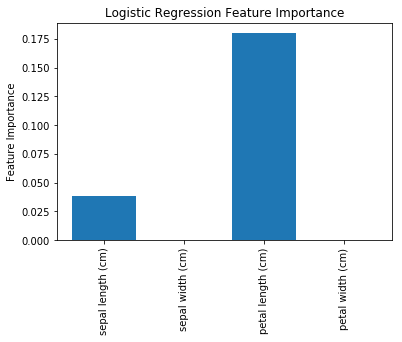

Random Forest Features Selected:  (150, 2)


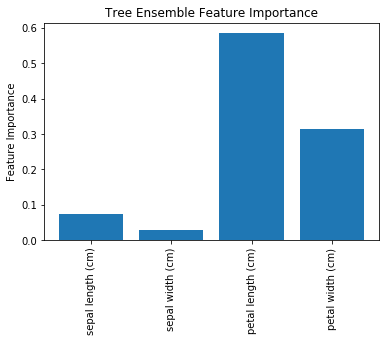

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

feat_labels = iris.feature_names 
l = LogisticRegression(C = 0.01, penalty = 'l1',)
model = SelectFromModel(l)

l.fit(X, y)
print('Logistic Regression Features Selected: ',model.fit_transform(X, y).shape)
plt.figure()
plt.bar([1,2,3,4], np.sum(l.coef_, axis =0)*-1)
plt.xticks([1,2,3,4], feat_labels , rotation =90)
plt.ylabel('Feature Importance')
plt.title('Logistic Regression Feature Importance')
plt.show()
X_l1 = model.fit_transform(X, y)



t = RandomForestClassifier()
model = SelectFromModel(t)
print('Random Forest Features Selected: ', model.fit_transform(X,y).shape)

t.fit(X, y)
plt.figure()
plt.bar([1,2,3,4], t.feature_importances_)
plt.xticks([1,2,3,4], feat_labels, rotation =90)
plt.ylabel('Feature Importance')
plt.title('Tree Ensemble Feature Importance')
plt.show()

X_rf = model.fit_transform(X, y)

## Feature Selection as Part of a Pipeline

http://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html#sklearn.pipeline.Pipeline

*sklearn.pipeline.Pipeline(steps, memory=None)*

Sequentially apply a list of transformations and a final estimator. Intermediate steps must be transformation objects.

*"The purpose of the pipeline is to assemble several steps that can be cross validated together while setting different parameters. It enables setting parameters of the various steps using their names and the parameter name seperated by '__". *

steps : list

List of (name, transform) tuples (implementing fit/transform) that are chained, in the order in which they are chained, with the last object an estimator.


In [ ]:
from sklearn.pipeline import Pipeline
clf = Pipeline([
  ('feature_selection', SelectFromModel(LogisticRegression(penalty="l1"))),
  ('classification', RandomForestClassifier())
])

clf.set_params(classification__n_estimators=12)
clf.fit(X, y)

Pipeline(memory=None,
     steps=[('feature_selection', SelectFromModel(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0...n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

# Feature Engineering

https://machinelearningmastery.com/discover-feature-engineering-how-to-engineer-features-and-how-to-get-good-at-it/

https://www.quora.com/What-are-some-general-tips-on-feature-selection-and-engineering-that-every-data-scientist-should-know

## Importance of Feature Engineering

**"The results you achieve are a factor of the model you choose, the data you have available and the features you prepared."  **

Good Features means flexibility and less complex models, performing better despite limitations of the model chosen.

With good features, you are closer to the underlying problem and a representation of all the data you have available and could use to best characterize that underlying problem.


*"Feature engineering is the process of transforming raw data into features that better represent the underlying problem to the predictive models, resulting in improved model accuracy on unseen data. "*


## Subproblems of Feature Engineering



Meaningful discriminates between features and attributes. Features are attributes that are useful to your problem (contested definition)

### Feature Importance
 A precursor to selecting features. Usually assign scores to each feature and ranked. Include highest scores into the training set and move onto model selection. Feature importance can show correlations inbetween dependent and independent variables.
 
### Feature Extraction
 
 automatically reducing the dimensionality of very voluminous attributes. Sort of synonamous with **Dimensionality Reduction**. PCA, Edge Detection, Unsupervised clustering als
 
### Feature Selection

https://www.quora.com/How-valuable-do-you-think-feature-selection-is-in-machine-learning-Which-do-you-think-improves-accuracy-more-feature-selection-or-feature-engineering

Irrelevent attributes need to be removed. FS selects features that are most informational to the model.

### Feature Construction

Making new features from existing data.

### Feature Learning

Automatic identification and use of features in raw data. Allows models to learn abstract representations of features, (Decision planes, weights, etc.)

How the model interprets data in a feature space into a new representation in a different decision space.


## Process of Feature Engineering



### Machine Learning Process

Applied Machine Learning 

- problem definition - what is the end goal? 
- data selection -what datasets might be useful/ how do i get them in an actionable form? Maybe Scraping, put it into a database...
- data preprocessing - format data, clean (NaN fill/remove), sample it.
- Transform Data -Feature Engineering
- Model Data - Create models evaluate and tweek.
- Prepare Results


*"We can see that feature engineering is followed by modeling. It suggests a strong interaction with modeling, reminding us of the interplay of devising features and testing them against the coalface of our test harness and final performance measures"*


### Iterative Feature Engineering Process


